<a href="https://colab.research.google.com/github/ismailhossain254/Plant-disease-detection-using-image-processing/blob/main/CropDisease_withCNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Libs

In [ ]:
!pip install tensorflow==2.8
!apt install --allow-change-held-packages libcudnn8=8.1.0.77-1+cuda11.2

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     / 668.3 MB 328 kB/s
     |████████████████████████████████| 462 kB 15.6 MB/s 
  Attempting uninstall: tensorflow
    Found existing installation: tensorflow 2.8.2+zzzcolab20220527125636
    Uninstalling tensorflow-2.8.2+zzzcolab20220527125636:
      Successfully uninstalled tensorflow-2.8.2+zzzcolab20220527125636
Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
The following packages will be REMOVED:
  libcudnn8-dev
The following held packages will be changed:
  libcudnn8
The following packages will be upgraded:
  libcudnn8
1 upgraded, 0 newly installed, 1 to remove and 47 not upgraded.
Need to get 430 MB of archives.
After this operation, 3,139 MB disk space will be freed.
Get:1 https://developer.downloa

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Load Images

In [ ]:
train_data_gen = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1/255.0
)
train_images = train_data_gen.flow_from_directory(
    'drive/My Drive/AugmentedData',
    batch_size=32, 
    target_size=(228, 228)
)

Found 1082 images belonging to 3 classes.


In [ ]:
valid_data_gen = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1/255.0
)
valid_images = valid_data_gen.flow_from_directory(
    'drive/My Drive/data',
    batch_size=24,
    target_size=(228, 228)
)

Found 120 images belonging to 3 classes.


In [ ]:
next(valid_images)[1]

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.]], dtype=float32)

In [ ]:

def plotLoss(history: pd.DataFrame):
    plt.figure(figsize=(18, 10))
    plt.plot(history.index.values,
             history['loss'], label='Training Error', color='darkorange', linewidth=3)
    plt.plot(history.index.values, history['val_loss'],
             label='Validation Error', color='lightgreen', linewidth=3)
    plt.legend()
    plt.grid(True)
    plt.show()


def plotAccuracy(history: pd.DataFrame):
    plt.figure(figsize=(18, 10))
    plt.plot(history.index.values, history['accuracy'],
             label='Training Accuracy', color='darkorange', linewidth=3)
    plt.plot(history.index.values, history['val_accuracy'],
             label='Validation Accuracy', color='lightgreen', linewidth=3)
    plt.legend()
    plt.grid(True)
    plt.show()

# Convolution Neural Network

In [ ]:
cnn = tf.keras.Sequential([
        # Convolution Feature Extraction
        tf.keras.layers.Conv2D(
           filters=32, kernel_size=(3,3),
           strides=(1,1), activation='relu',
           input_shape=(228, 228, 3), padding='same'
        ), 
        # Dimesionality Reduction
        tf.keras.layers.MaxPool2D(
           pool_size=(2,2), strides=(1,1), padding='same'
        ),

        

        # Batch Normalization
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Flatten(),

        # fulluy Connected Network
        tf.keras.layers.Dense(units=128, activation='relu'),
        tf.keras.layers.Dropout(rate=0.25, seed=42),
        tf.keras.layers.Dense(units=3, activation='softmax')
])

In [ ]:
cnn.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [ ]:
tf.config.experimental.list_physical_devices()

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'),
 PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [ ]:
with tf.device('/device:GPU:0'):
    cnn.fit(
        train_images, 
        epochs=25,
        validation_data=valid_images
    )

Epoch 1/25
34/34 [==============================] - 8s 224ms/step - loss: 76.7881 - accuracy: 0.5823 - val_loss: 33.1354 - val_accuracy: 0.3417
Epoch 2/25
34/34 [==============================] - 7s 209ms/step - loss: 2.5370 - accuracy: 0.5739 - val_loss: 7.2338 - val_accuracy: 0.3917
Epoch 3/25
34/34 [==============================] - 7s 200ms/step - loss: 1.1496 - accuracy: 0.5721 - val_loss: 2.7458 - val_accuracy: 0.4250
Epoch 4/25
34/34 [==============================] - 7s 201ms/step - loss: 1.6370 - accuracy: 0.6331 - val_loss: 1.6858 - val_accuracy: 0.4417
Epoch 5/25
34/34 [==============================] - 7s 201ms/step - loss: 1.3321 - accuracy: 0.6756 - val_loss: 0.8384 - val_accuracy: 0.5917
Epoch 6/25
34/34 [==============================] - 7s 201ms/step - loss: 0.7389 - accuracy: 0.6793 - val_loss: 1.3139 - val_accuracy: 0.6833
Epoch 7/25
34/34 [==============================] - 7s 200ms/step - loss: 0.8964 - accuracy: 0.6553 - val_loss: 0.8634 - val_accuracy: 0.5250
Epoc

In [ ]:
cnn.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 228, 228, 32)      896       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 228, 228, 32)     0         
 2D)                                                             
                                                                 
 batch_normalization_1 (Batc  (None, 228, 228, 32)     128       
 hNormalization)                                                 
                                                                 
 flatten_2 (Flatten)         (None, 1663488)           0         
                                                                 
 dense_4 (Dense)             (None, 128)               212926592 
                                                                 
 dropout_2 (Dropout)         (None, 128)              

In [ ]:
hist = pd.DataFrame(cnn.history.history)
hist

,loss,accuracy,val_loss,val_accuracy
0,76.788086,0.582255,33.135376,0.341667
1,2.537040,0.573937,7.233796,0.391667
2,1.149596,0.572089,2.745827,0.425000
3,1.636991,0.633087,1.685813,0.441667
4,1.332133,0.675601,0.838440,0.591667
5,0.738946,0.679298,1.313927,0.683333
6,0.896409,0.655268,0.863438,0.525000
7,0.646087,0.675601,0.588385,0.750000
8,0.643178,0.670055,0.732854,0.616667
9,0.610141,0.700555,0.688799,0.683333


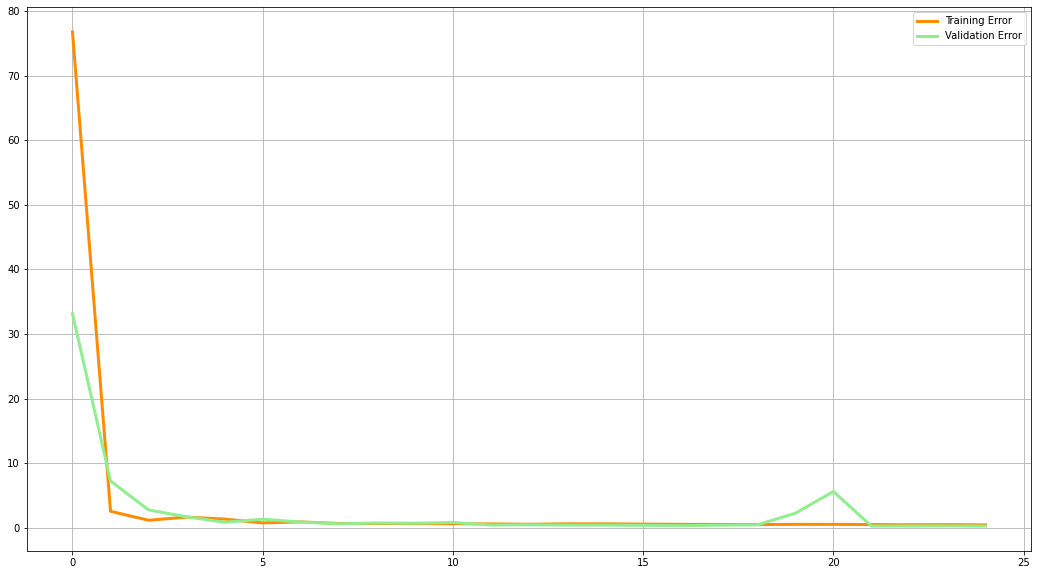

In [ ]:
plotLoss(hist)

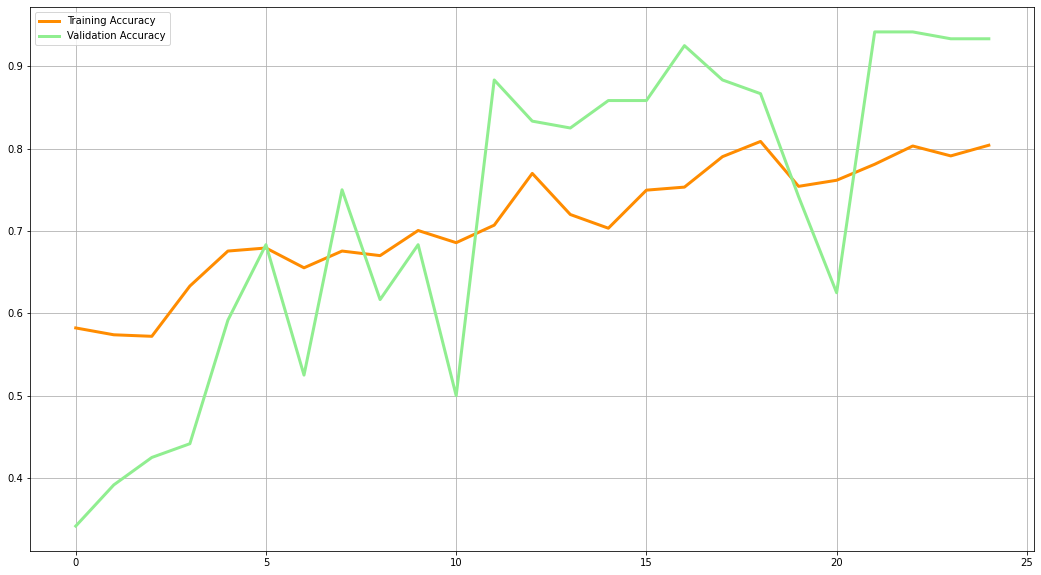

In [ ]:
plotAccuracy(hist)

# DCNN

In [ ]:
deep_cnn = tf.keras.Sequential([
        # Convolution Feature Extraction
        tf.keras.layers.Conv2D(
           filters=32, kernel_size=(3,3),
           strides=(1,1), activation='relu',
           input_shape=(228, 228, 3), padding='same'
        ), 
        # Dimesionality Reduction
        tf.keras.layers.MaxPool2D(
           pool_size=(2,2), strides=(1,1), padding='same'
        ),

        tf.keras.layers.Conv2D(
           filters=64, kernel_size=(4,4),
           strides=(2,3), activation='relu',
           padding='same'
        ), 
        # Dimesionality Reduction
        tf.keras.layers.MaxPool2D(
           pool_size=(2,2), strides=(1,1), padding='same'
        ),

        # Batch Normalization
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Flatten(),

        # fully Connected Network
        tf.keras.layers.Dense(units=128, activation='relu'),
        tf.keras.layers.Dropout(rate=0.5, seed=42),
        tf.keras.layers.Dense(units=64, activation='relu'),
        tf.keras.layers.Dense(units=3, activation='softmax')
])

In [ ]:
deep_cnn.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [ ]:
with tf.device('/device:GPU:0'):
    deep_cnn.fit(
        train_images, 
        epochs=25,
        validation_data=valid_images
    )

Epoch 1/25
34/34 [==============================] - 8s 220ms/step - loss: 15.4895 - accuracy: 0.4455 - val_loss: 5.5654 - val_accuracy: 0.3417
Epoch 2/25
34/34 [==============================] - 7s 202ms/step - loss: 2.2693 - accuracy: 0.4464 - val_loss: 1.2307 - val_accuracy: 0.3500
Epoch 3/25
34/34 [==============================] - 8s 239ms/step - loss: 1.3275 - accuracy: 0.3956 - val_loss: 1.0306 - val_accuracy: 0.4000
Epoch 4/25
34/34 [==============================] - 7s 200ms/step - loss: 1.1316 - accuracy: 0.4076 - val_loss: 1.0265 - val_accuracy: 0.3750
Epoch 5/25
34/34 [==============================] - 7s 202ms/step - loss: 1.0539 - accuracy: 0.4205 - val_loss: 1.0280 - val_accuracy: 0.4583
Epoch 6/25
34/34 [==============================] - 7s 201ms/step - loss: 1.0039 - accuracy: 0.4501 - val_loss: 1.2621 - val_accuracy: 0.3667
Epoch 7/25
34/34 [==============================] - 7s 203ms/step - loss: 0.9824 - accuracy: 0.4741 - val_loss: 0.9922 - val_accuracy: 0.4333
Epoch

In [ ]:
hist = pd.DataFrame(deep_cnn.history.history)
hist

,loss,accuracy,val_loss,val_accuracy
0,13.816133,0.627542,10.393582,0.333333
1,1.024853,0.746765,8.940322,0.333333
2,0.687765,0.783734,7.147178,0.333333
3,0.427821,0.829020,4.293419,0.375000
4,0.320108,0.873383,1.093925,0.541667
5,0.258252,0.893715,0.461415,0.875000
6,0.315161,0.904806,0.456195,0.783333
7,0.244566,0.900185,33.933453,0.358333
8,0.209562,0.912200,0.171592,0.966667
9,0.218298,0.919593,1.163677,0.766667


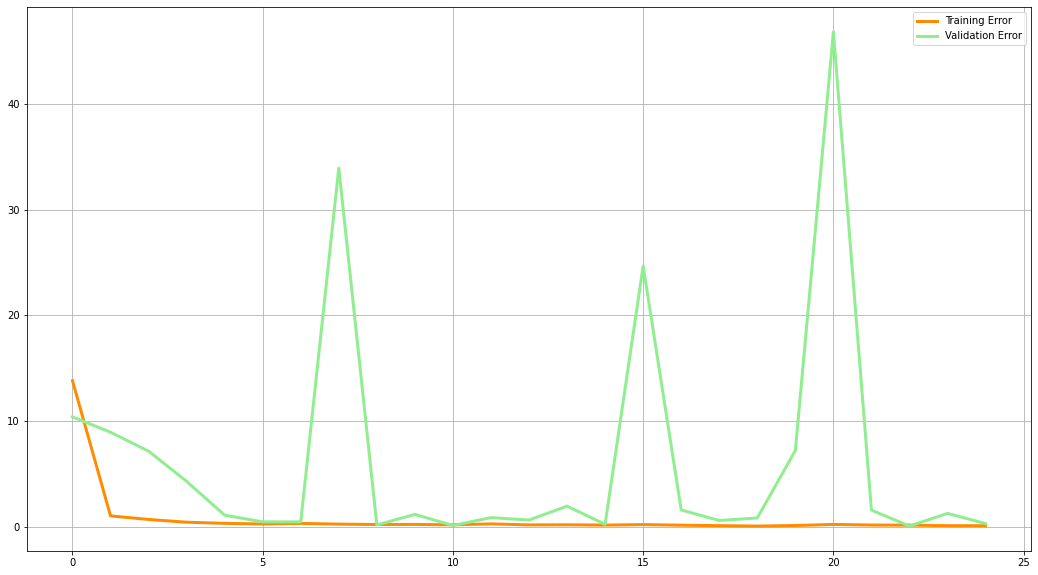

In [ ]:
plotLoss(hist)

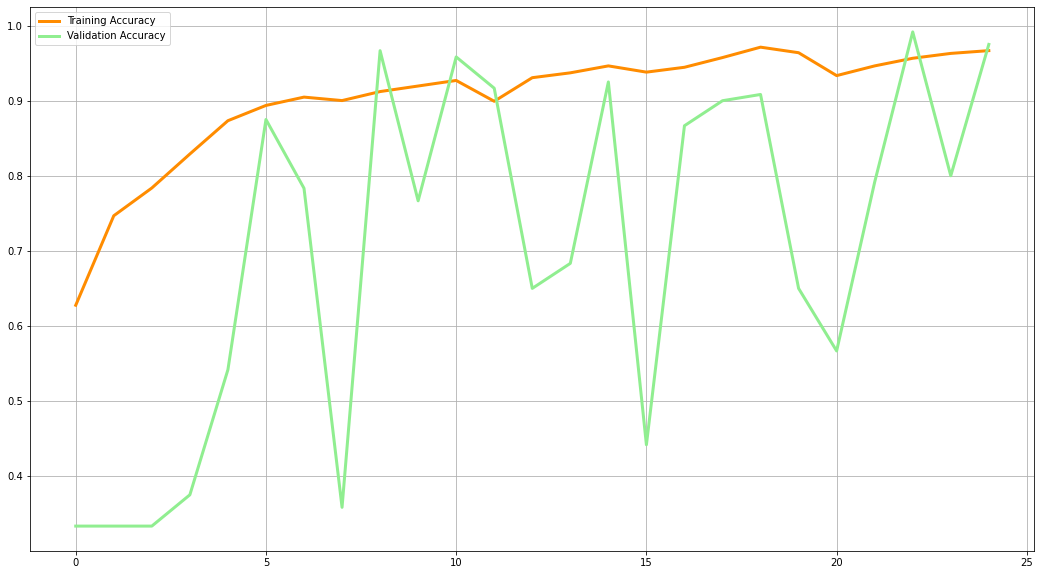

In [ ]:
plotAccuracy(hist)